In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("results.csv")

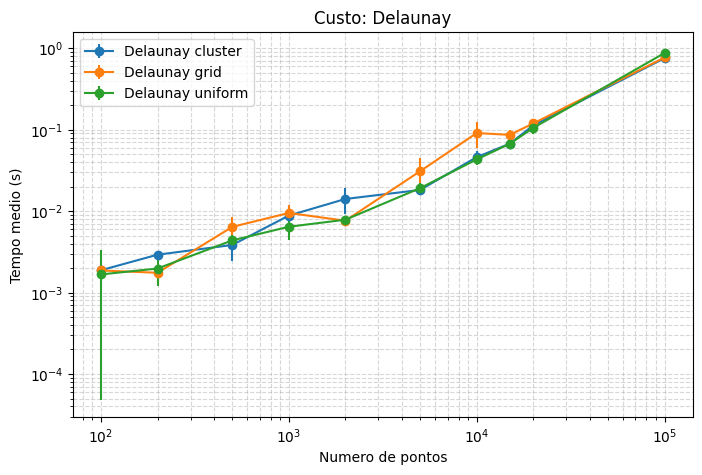

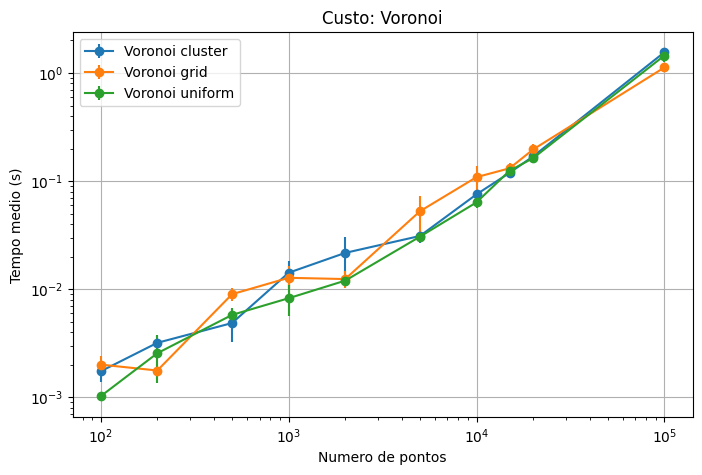

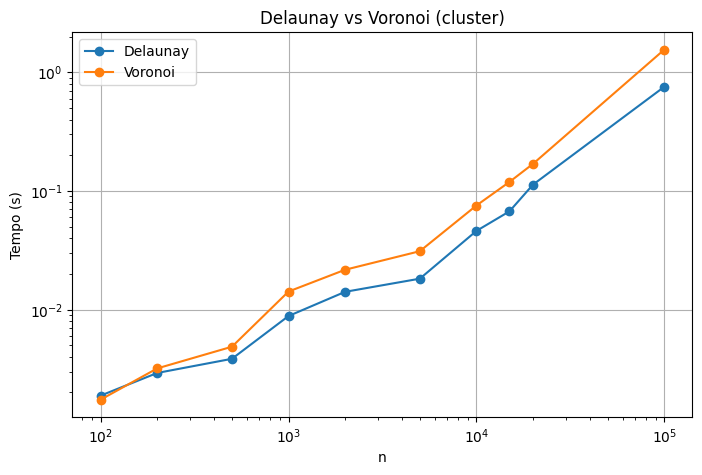

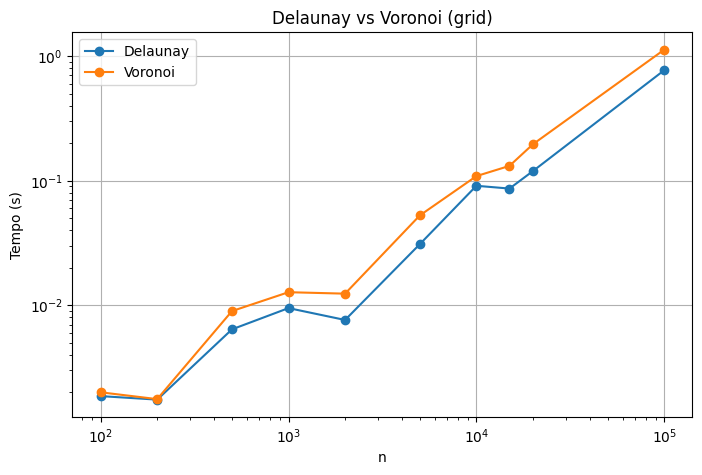

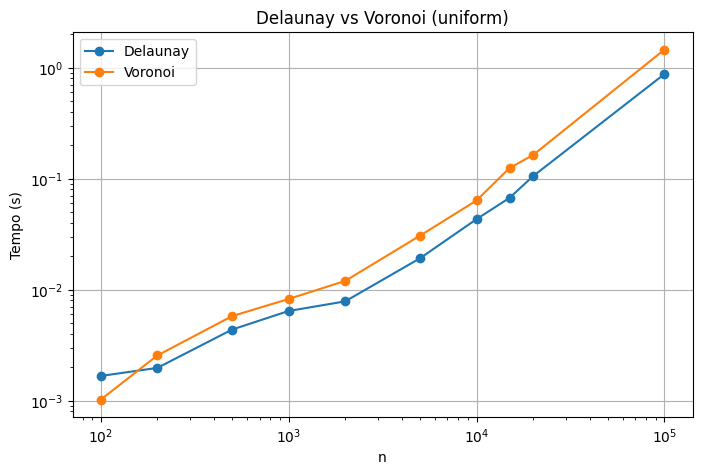

In [3]:
plt.figure(figsize=(8,5))
for dist, g in df.groupby("tipo"):
    plt.errorbar(g["qnt_points"], g["delaunay_mean"], yerr=g["delaunay_std"], label=f"Delaunay {dist}", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Numero de pontos")
plt.ylabel("Tempo medio (s)")
plt.title("Custo: Delaunay")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.savefig("delaunay_vs_n.png", dpi=200)

plt.figure(figsize=(8,5))
for dist, g in df.groupby("tipo"):
    plt.errorbar(g["qnt_points"], g["voronoi_mean"], yerr=g["voronoi_std"], label=f"Voronoi {dist}", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Numero de pontos")
plt.ylabel("Tempo medio (s)")
plt.title("Custo: Voronoi")
plt.legend()
plt.grid(True)
plt.savefig("voronoi_vs_n.png", dpi=200)

for dist, g in df.groupby("tipo"):
    plt.figure(figsize=(8,5))
    plt.plot(g["qnt_points"], g["delaunay_mean"], marker='o', label="Delaunay")
    plt.plot(g["qnt_points"], g["voronoi_mean"], marker='o', label="Voronoi")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("n")
    plt.ylabel("Tempo (s)")
    plt.title(f"Delaunay vs Voronoi ({dist})")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"compare_{dist}.png", dpi=200)

No teórico, ambos algoritmos tem uma complexidade entre O(n log n) na média, e O(n
⌈d/2⌉) no limite inferior. Primeiros testes foram feitos somente com as distribuições por cluster e uniforme, ao final foi adicionado uma distribuição por grid, para tentarmos um pior caso com cada algoritmo.




Podemos ver que o cálculo do voronoy é mais demorado, creio que muito se passa pela lógica que o algoritmo precisa realizar uma etapas adicionais não necessárias no delaunay (arestas que tendem ao infinito e identificação de arestas, por ex.)